In [40]:
## IMPORTACIÓN GENERAL DE LIBRERIAS Y VISUALIZACIÓN DE DATOS (matplotlib y seaborn)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as DT
import warnings
import descartes
import geopandas as gpd
import json
import requests
import geocoder

# Random Forest.
from sklearn.ensemble import RandomForestRegressor
from shapely.geometry import Point, Polygon
#from urllib2 import urlopen
from urllib.request import urlopen #Python3


# XGBoost.
from xgboost import XGBClassifier
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

%matplotlib inline
warnings.filterwarnings('ignore')
plt.style.use('default') 
sns.set(style="whitegrid") 
plt.rcParams['figure.figsize'] = (15, 10)

In [41]:
# LECTURAS DE CSV YA PROCESADOS.
train = pd.read_csv('DATA/trainProcesado_preciov2.csv')
test = pd.read_csv('DATA/testProcesado_patov2.csv')

In [42]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240000 entries, 0 to 239999
Data columns (total 22 columns):
id                            240000 non-null int64
antiguedad                    240000 non-null int64
habitaciones                  240000 non-null int64
garages                       240000 non-null int64
banos                         240000 non-null int64
metroscubiertos               240000 non-null int64
metrostotales                 240000 non-null int64
gimnasio                      240000 non-null int64
usosmultiples                 240000 non-null int64
piscina                       240000 non-null int64
escuelascercanas              240000 non-null int64
centroscomercialescercanos    240000 non-null int64
anio                          240000 non-null int64
precio                        240000 non-null float64
ciudad                        240000 non-null int64
provincia                     240000 non-null int64
tipodepropiedad               240000 non-null int64
tit

In [43]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Data columns (total 21 columns):
id                            60000 non-null int64
antiguedad                    60000 non-null int64
habitaciones                  60000 non-null int64
garages                       60000 non-null int64
banos                         60000 non-null int64
metroscubiertos               60000 non-null int64
metrostotales                 60000 non-null int64
gimnasio                      60000 non-null int64
usosmultiples                 60000 non-null int64
piscina                       60000 non-null int64
escuelascercanas              60000 non-null int64
centroscomercialescercanos    60000 non-null int64
anio                          60000 non-null int64
ciudad                        60000 non-null int64
provincia                     60000 non-null int64
tipodepropiedad               60000 non-null int64
titulo_features_enc           60000 non-null int64
descripcion_features_enc

In [44]:
Y = np.array(train['precio'])
X = train.drop('precio', axis = 1)
X = X.drop('id', axis = 1)

In [45]:
Y = np.array(train['precio'])
X = train.drop('precio', axis = 1)

In [46]:
trainX, testX, trainY, testY = train_test_split(X, Y, test_size=0.2, random_state=42)

# XGBOOST

In [47]:
data_dmatrix_inst = xgb.DMatrix(data=trainX,label=trainY)
#X_train_inst, X_test_inst, y_train_inst, y_test_inst = train_test_split(trainX, trainY, test_size=0.25, random_state=100)
xg_reg = xgb.XGBRegressor(objective = 'reg:linear', 
                          colsample_bytree = 0.3, 
                          learning_rate = 0.05,
                          max_depth = 10, 
                          alpha = 7, 
                          n_estimators = 500)

In [48]:
xg_reg.fit(trainX,trainY)

[02:37:19] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1572314959925/work/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(alpha=7, base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.3, gamma=0,
             importance_type='gain', learning_rate=0.05, max_delta_step=0,
             max_depth=10, min_child_weight=1, missing=None, n_estimators=500,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [49]:
y_pred = xg_reg.predict(testX)
# Calculamos el error absoluto.
errors = abs(y_pred - testY)
# Imprimimos el error.
print('Error:', round(np.mean(errors), 2), 'grados.')

Error: 593251.05 grados.


In [50]:
# Calculamos el porcentaje de error.
mape = 100 * (errors / testY)
# Calculate la precisión.
accuracy = 100 - np.mean(mape)
print('Precision:', round(accuracy, 2), '%.')

Precision: 71.24 %.


In [52]:
test.drop('id',1)
train.drop('id',1)
prediccion = xg_reg.predict(test)#.drop('id', 1))

In [55]:
## =================================================================================================
## ARMAMOS EN BASE A LA PREDICCIÓN QUE TENEMOS UN CSV PARA SUBIR A KAGGLE CON EL FORMATO INDICADO!
## =================================================================================================
submission = pd.DataFrame({ 'id': test['id'], 'target': prediccion })
submission.to_csv("SUBMITS/007_G34_XGBoost_patov2.csv", index=False)

# Featuring Importance

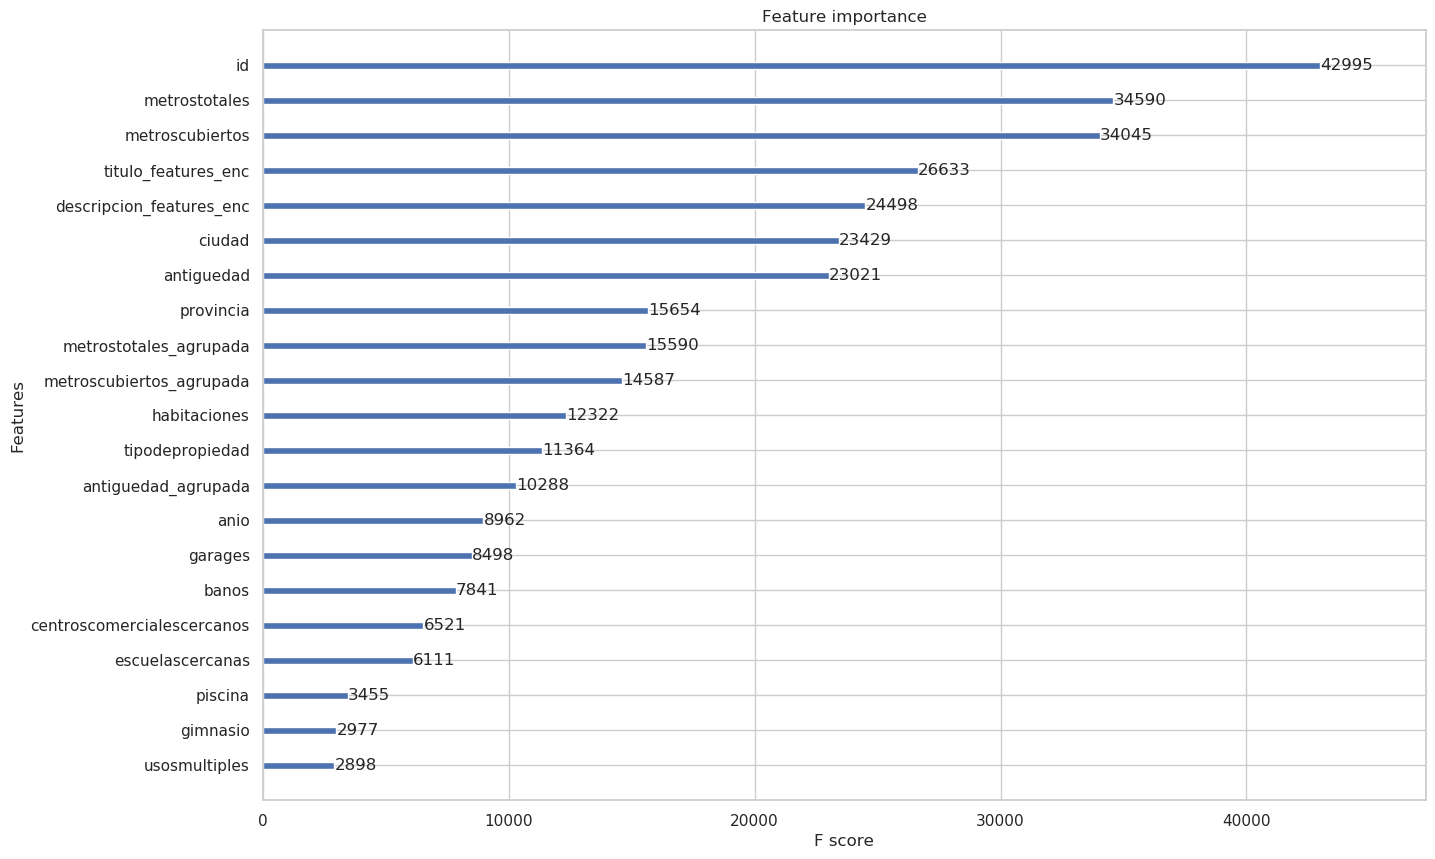

In [54]:
import matplotlib.pyplot as plt

xgb.plot_importance(xg_reg)
plt.rcParams['figure.figsize'] = [5, 5]
plt.show()